In [2]:
!pip install gdown
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
link = 'https://drive.google.com/open?id=10kPzQgVRdn49UJaKYlQsXHd0NNQJvnif' # The shareable link

In [7]:
fluff, id = link.split('=')
print (id) # Verify that I have everything after '='

10kPzQgVRdn49UJaKYlQsXHd0NNQJvnif


In [135]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('clean_steam_data.csv')  
steam_data = pd.read_csv('clean_steam_data.csv')
# Dataset is now stored in a Pandas Dataframe

In [33]:
steam_data.shape

(1004, 14)

In [10]:
steam_data.head()

,app_id,name,developer,publisher,positive,negative,average_forever,median_forever,languages,genre,ccu,tags,metacritic_score,total_recommendations
0,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0
1,20,Team Fortress Classic,Valve,Valve,6009,954,729,10,"English, French, German, Italian, Spanish - Sp...",Action,113,"{'Action': 756, 'FPS': 314, 'Multiplayer': 266...",NaN,5034.0
2,30,Day of Defeat,Valve,Valve,5384,597,1039,18,"English, French, German, Italian, Spanish - Spain",Action,134,"{'FPS': 791, 'World War II': 257, 'Multiplayer...",79.0,3431.0
3,40,Deathmatch Classic,Valve,Valve,2023,459,1139,10,"English, French, German, Italian, Spanish - Sp...",Action,14,"{'Action': 631, 'FPS': 142, 'Classic': 109, 'M...",NaN,1697.0
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,15505,792,1022,137,"English, French, German, Korean",Action,259,"{'FPS': 894, 'Action': 335, 'Classic': 264, 'S...",NaN,13557.0


In [136]:
steam_data.drop(['metacritic_score', 'total_recommendations'], axis=1, inplace=True)
steam_data.replace(['', 0], np.nan, inplace=True)
steam_data.dropna(inplace=True)

In [137]:
steam_data.shape

(963, 12)

In [94]:
steam_data.head()

,app_id,name,developer,publisher,positive,negative,average_forever,median_forever,languages,genre,ccu,tags
0,10.0,Counter-Strike,Valve,Valve,208048.0,5311.0,12189.0,213.0,"English, French, German, Italian, Spanish - Sp...",Action,13743.0,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3..."
1,20.0,Team Fortress Classic,Valve,Valve,6009.0,954.0,729.0,10.0,"English, French, German, Italian, Spanish - Sp...",Action,113.0,"{'Action': 756, 'FPS': 314, 'Multiplayer': 266..."
2,30.0,Day of Defeat,Valve,Valve,5384.0,597.0,1039.0,18.0,"English, French, German, Italian, Spanish - Spain",Action,134.0,"{'FPS': 791, 'World War II': 257, 'Multiplayer..."
3,40.0,Deathmatch Classic,Valve,Valve,2023.0,459.0,1139.0,10.0,"English, French, German, Italian, Spanish - Sp...",Action,14.0,"{'Action': 631, 'FPS': 142, 'Classic': 109, 'M..."
4,50.0,Half-Life: Opposing Force,Gearbox Software,Valve,15505.0,792.0,1022.0,137.0,"English, French, German, Korean",Action,259.0,"{'FPS': 894, 'Action': 335, 'Classic': 264, 'S..."


In [138]:
steam_data['neg_to_pos_ratio'] = steam_data['negative'] / steam_data['positive'] * 100
steam_data['neg_to_pos_ratio'].describe()

count    963.000000
mean      21.002014
std       24.435727
min        1.160373
25%        7.104731
50%       13.456248
75%       25.646641
max      258.512669
Name: neg_to_pos_ratio, dtype: float64

In [96]:
steam_data.head()

,app_id,name,developer,publisher,positive,negative,average_forever,median_forever,languages,genre,ccu,tags,neg_to_pos_ratio
0,10.0,Counter-Strike,Valve,Valve,208048.0,5311.0,12189.0,213.0,"English, French, German, Italian, Spanish - Sp...",Action,13743.0,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",2.552776
1,20.0,Team Fortress Classic,Valve,Valve,6009.0,954.0,729.0,10.0,"English, French, German, Italian, Spanish - Sp...",Action,113.0,"{'Action': 756, 'FPS': 314, 'Multiplayer': 266...",15.876186
2,30.0,Day of Defeat,Valve,Valve,5384.0,597.0,1039.0,18.0,"English, French, German, Italian, Spanish - Spain",Action,134.0,"{'FPS': 791, 'World War II': 257, 'Multiplayer...",11.088410
3,40.0,Deathmatch Classic,Valve,Valve,2023.0,459.0,1139.0,10.0,"English, French, German, Italian, Spanish - Sp...",Action,14.0,"{'Action': 631, 'FPS': 142, 'Classic': 109, 'M...",22.689076
4,50.0,Half-Life: Opposing Force,Gearbox Software,Valve,15505.0,792.0,1022.0,137.0,"English, French, German, Korean",Action,259.0,"{'FPS': 894, 'Action': 335, 'Classic': 264, 'S...",5.108030


In [97]:
steam_data['neg_to_pos_ratio'].describe()

count    963.000000
mean      21.002014
std       24.435727
min        1.160373
25%        7.104731
50%       13.456248
75%       25.646641
max      258.512669
Name: neg_to_pos_ratio, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


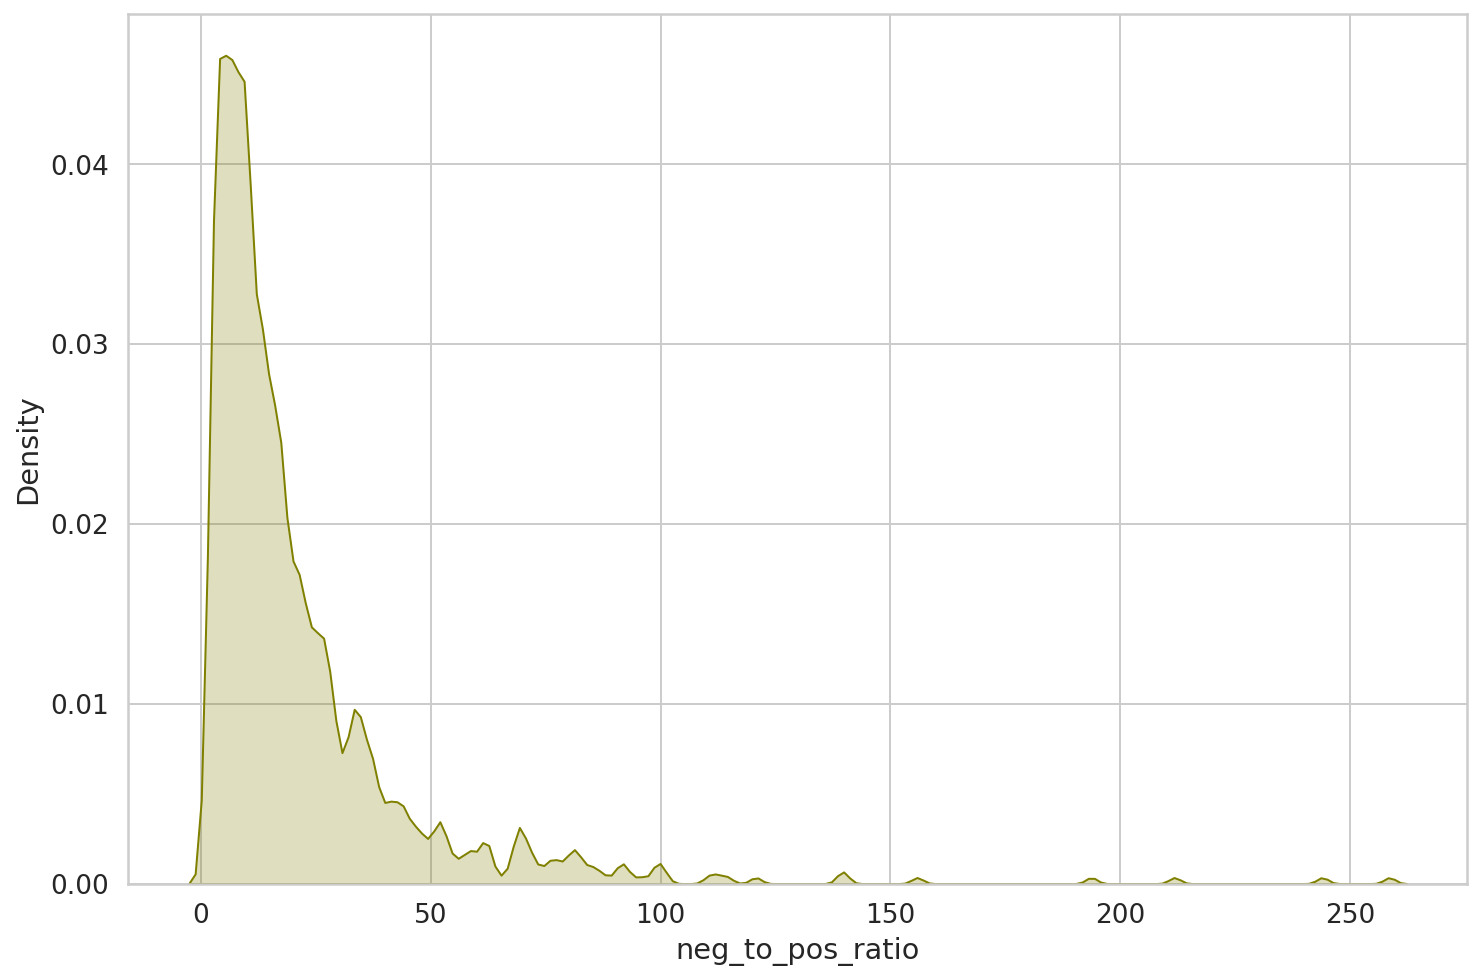

In [98]:
sns.kdeplot(steam_data.neg_to_pos_ratio, shade=True, bw = 0.05, color = 'olive')

In [139]:
# Categorising the target varible 
bins = [1.160373, 10, 20, 35, 258.512669]
labels = ['massive_hit', 'good_game', 'average_game', 'flop_game']
steam_data['N2Pr_binned'] = pd.cut(steam_data['neg_to_pos_ratio'], bins = bins, labels = labels)

Text(0.5, 1.0, 'Categorization of Games')

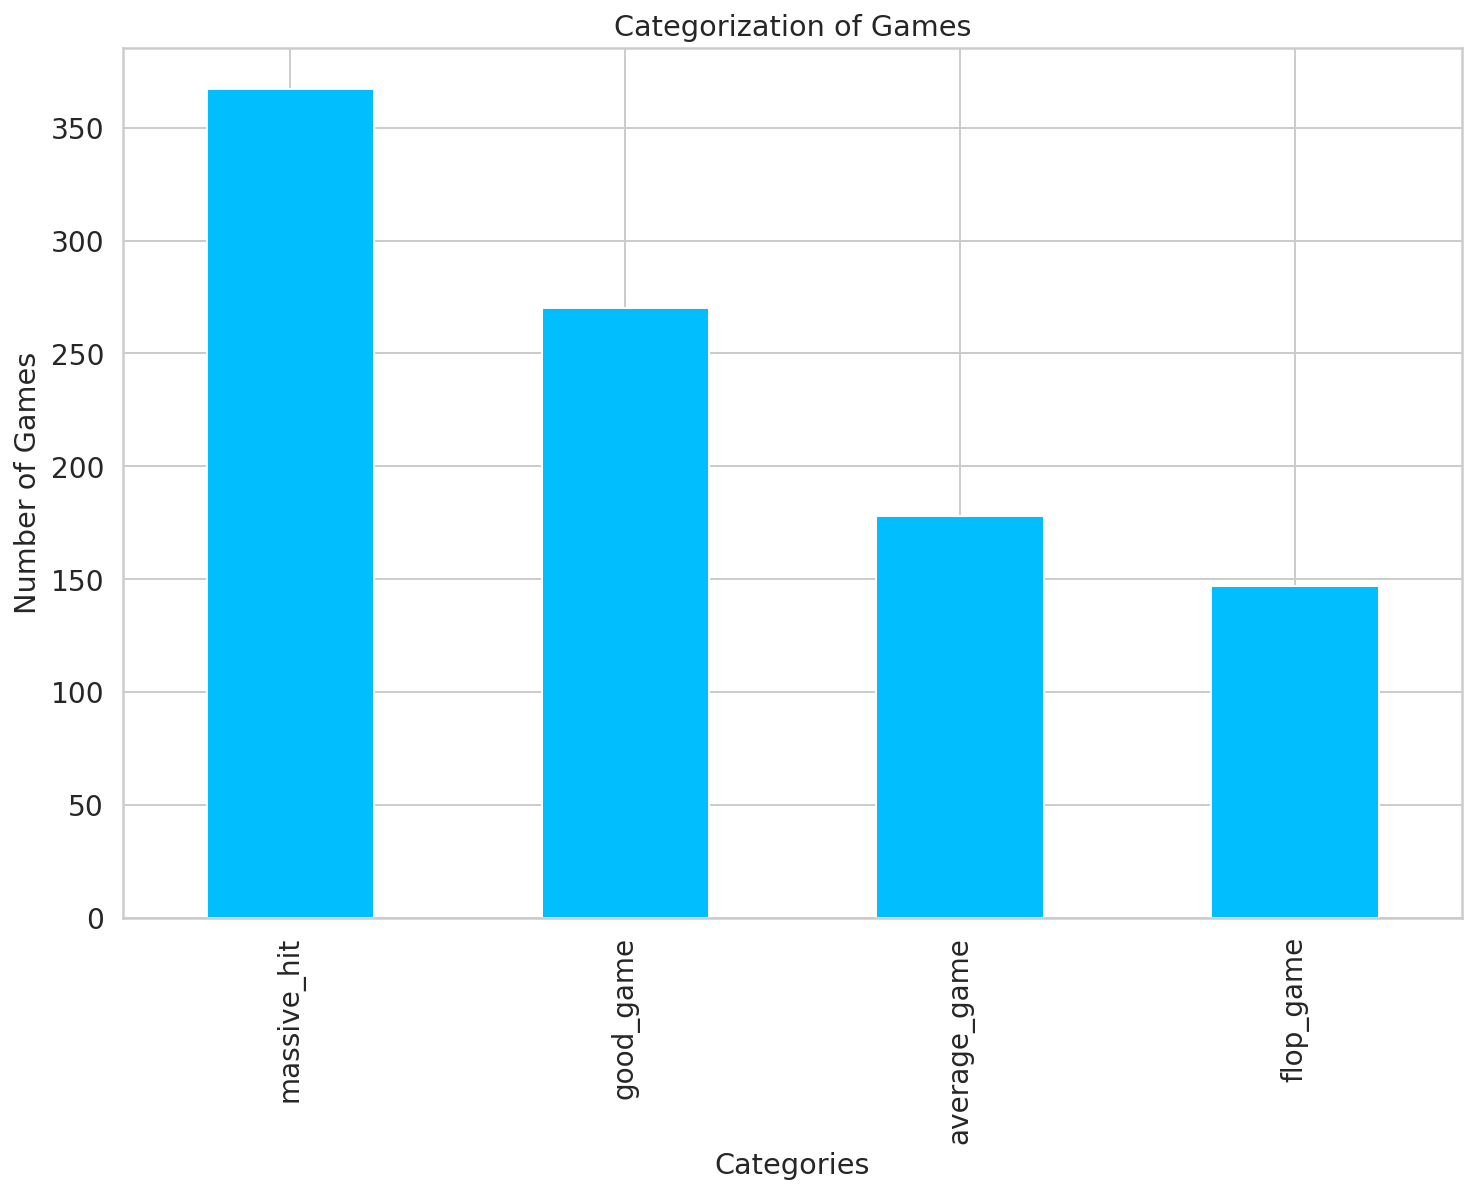

In [112]:
steam_data.groupby(['N2Pr_binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Games')
plt.title('Categorization of Games')

In [113]:
steam_data.head()

,app_id,name,developer,publisher,positive,negative,average_forever,median_forever,languages,genre,ccu,tags,neg_to_pos_ratio,N2Pr_binned
0,10.0,Counter-Strike,Valve,Valve,208048.0,5311.0,12189.0,213.0,"English, French, German, Italian, Spanish - Sp...",Action,13743.0,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",2.552776,massive_hit
1,20.0,Team Fortress Classic,Valve,Valve,6009.0,954.0,729.0,10.0,"English, French, German, Italian, Spanish - Sp...",Action,113.0,"{'Action': 756, 'FPS': 314, 'Multiplayer': 266...",15.876186,good_game
2,30.0,Day of Defeat,Valve,Valve,5384.0,597.0,1039.0,18.0,"English, French, German, Italian, Spanish - Spain",Action,134.0,"{'FPS': 791, 'World War II': 257, 'Multiplayer...",11.088410,good_game
3,40.0,Deathmatch Classic,Valve,Valve,2023.0,459.0,1139.0,10.0,"English, French, German, Italian, Spanish - Sp...",Action,14.0,"{'Action': 631, 'FPS': 142, 'Classic': 109, 'M...",22.689076,average_game
4,50.0,Half-Life: Opposing Force,Gearbox Software,Valve,15505.0,792.0,1022.0,137.0,"English, French, German, Korean",Action,259.0,"{'FPS': 894, 'Action': 335, 'Classic': 264, 'S...",5.108030,massive_hit


In [116]:
steam_data.describe(include = 'object')

,name,developer,publisher,languages,genre,tags
count,963,963,963,963,963,963
unique,959,676,465,684,220,959
top,Call of Duty: Modern Warfare 3,Valve,Electronic Arts,English,Action,"{'Action': 1217, 'FPS': 876, 'Multiplayer': 75..."
freq,2,27,36,114,149,2


In [140]:
steam_data.drop(['app_id', 'name', 'positive', 'negative', 'average_forever', 'median_forever'], axis=1, inplace=True)

In [128]:
steam_data.head()

,developer,publisher,languages,genre,ccu,tags,neg_to_pos_ratio,N2Pr_binned
0,Valve,Valve,"English, French, German, Italian, Spanish - Sp...",Action,13743.0,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",2.552776,massive_hit
1,Valve,Valve,"English, French, German, Italian, Spanish - Sp...",Action,113.0,"{'Action': 756, 'FPS': 314, 'Multiplayer': 266...",15.876186,good_game
2,Valve,Valve,"English, French, German, Italian, Spanish - Spain",Action,134.0,"{'FPS': 791, 'World War II': 257, 'Multiplayer...",11.088410,good_game
3,Valve,Valve,"English, French, German, Italian, Spanish - Sp...",Action,14.0,"{'Action': 631, 'FPS': 142, 'Classic': 109, 'M...",22.689076,average_game
4,Gearbox Software,Valve,"English, French, German, Korean",Action,259.0,"{'FPS': 894, 'Action': 335, 'Classic': 264, 'S...",5.108030,massive_hit


In [141]:
# Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['developer', 'publisher', 'languages', 'genre', 'ccu', 'tags']
steam_data[cat_list] = steam_data[cat_list].apply(lambda x:le.fit_transform(x))

In [130]:
steam_data.head()

,developer,publisher,languages,genre,ccu,tags,neg_to_pos_ratio,N2Pr_binned
0,623,424,80,0,675,66,2.552776,massive_hit
1,623,424,63,0,87,80,15.876186,good_game
2,623,424,55,0,102,272,11.088410,good_game
3,623,424,63,0,13,73,22.689076,average_game
4,235,424,85,0,173,276,5.108030,massive_hit


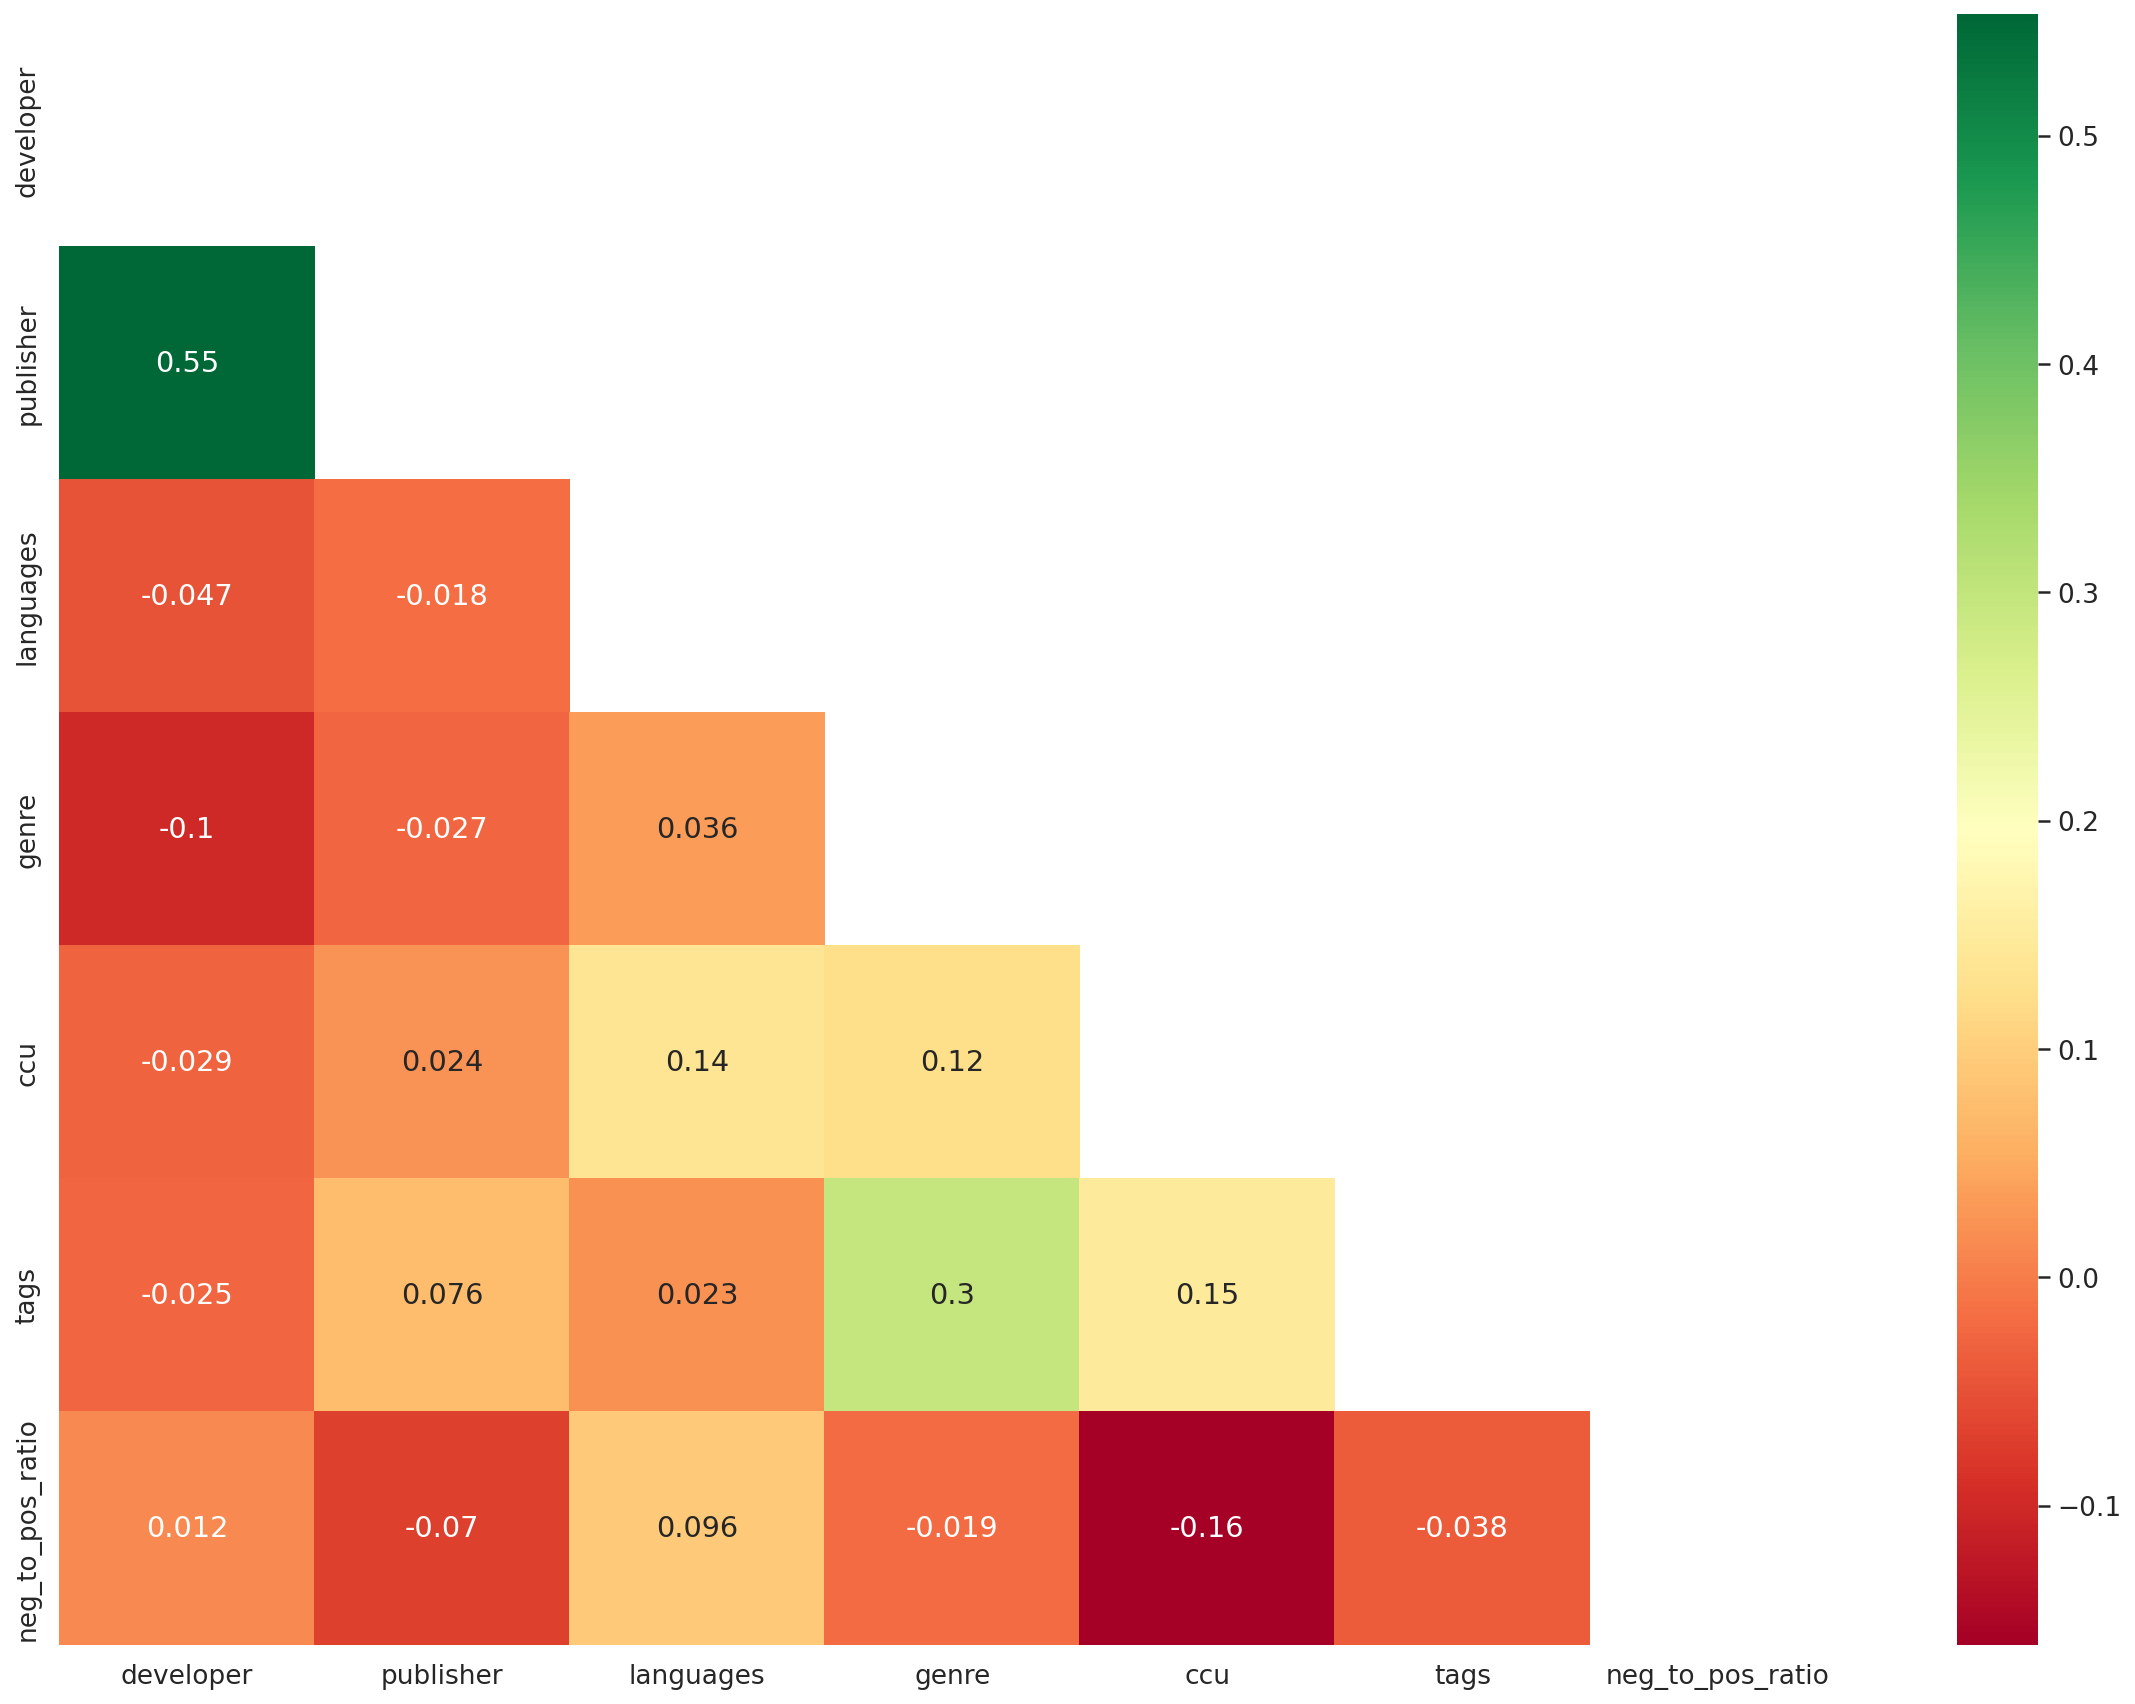

In [131]:
# Finding Correlation between variables
corr = steam_data.corr()
mask = np.zeros(corr.shape, dtype = bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize = (20, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap = 'RdYlGn', annot=True, mask = mask)

In [142]:
steam_data.drop('neg_to_pos_ratio', axis=1, inplace=True)

In [145]:
steam_data.dropna(inplace = True)
steam_data.shape

(962, 7)

In [146]:
#Independent Variables
X = steam_data.iloc[:, 0:6].values
#Dependent/Target Variable
y = steam_data.iloc[:, 6].values
y

['massive_hit', 'good_game', 'good_game', 'average_game', 'massive_hit', ..., 'good_game', 'average_game', 'flop_game', 'massive_hit', 'good_game']
Length: 962
Categories (4, object): ['massive_hit' < 'good_game' < 'average_game' < 'flop_game']

In [147]:
# Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify = y)
print(X_train.shape)
print(y_train.shape)

(817, 6)
(817,)


In [148]:
# Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [149]:
# Performing Recursive Feauture Elimation with Cross Validation
# Using Random forest for RFE-CV and logloss as scoring
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
clf_rf = RandomForestClassifier(random_state = 0)
rfecv = RFECV(estimator = clf_rf, step = 1, cv = 5, scoring = 'neg_log_loss')
rfecv=rfecv.fit(X_train, y_train)

In [150]:
# Optimal number of features
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 6
Best features : Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')


In [154]:
# Feauture Ranking
clf_rf = clf_rf.fit(X_train, y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


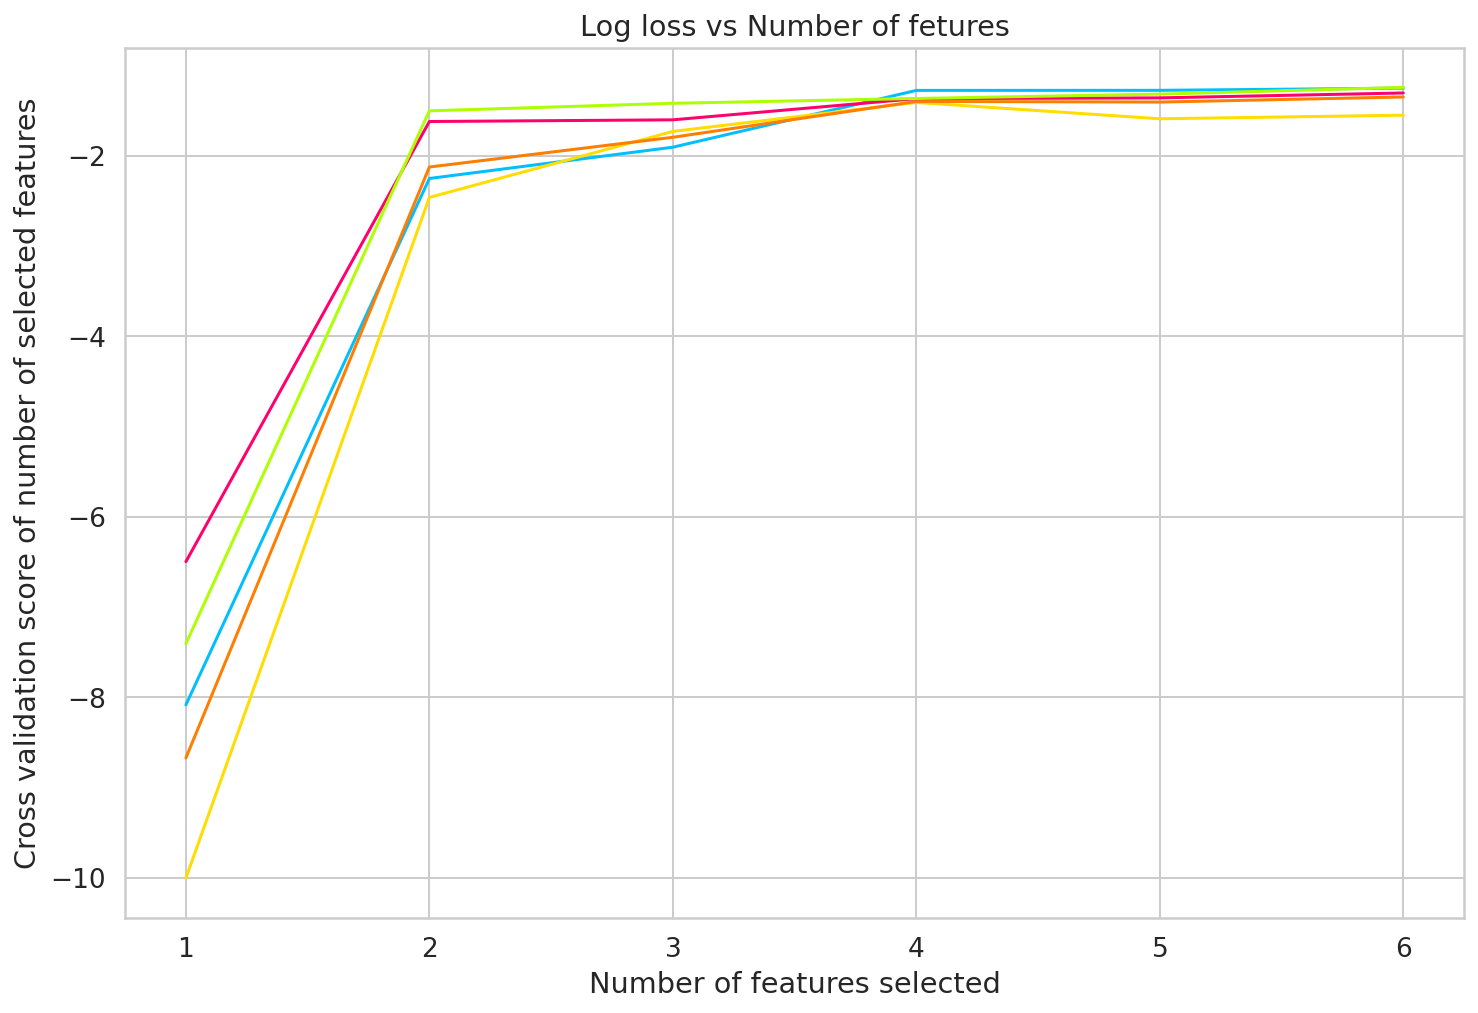

In [155]:
# Logloss vs Number of features
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.title("Log loss vs Number of fetures")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [156]:
# Selecting the Important Features
X_opt = X_train.iloc[:, X_train.columns[rfecv.support_]]
X_test = X_test.iloc[:, X_test.columns[rfecv.support_]]

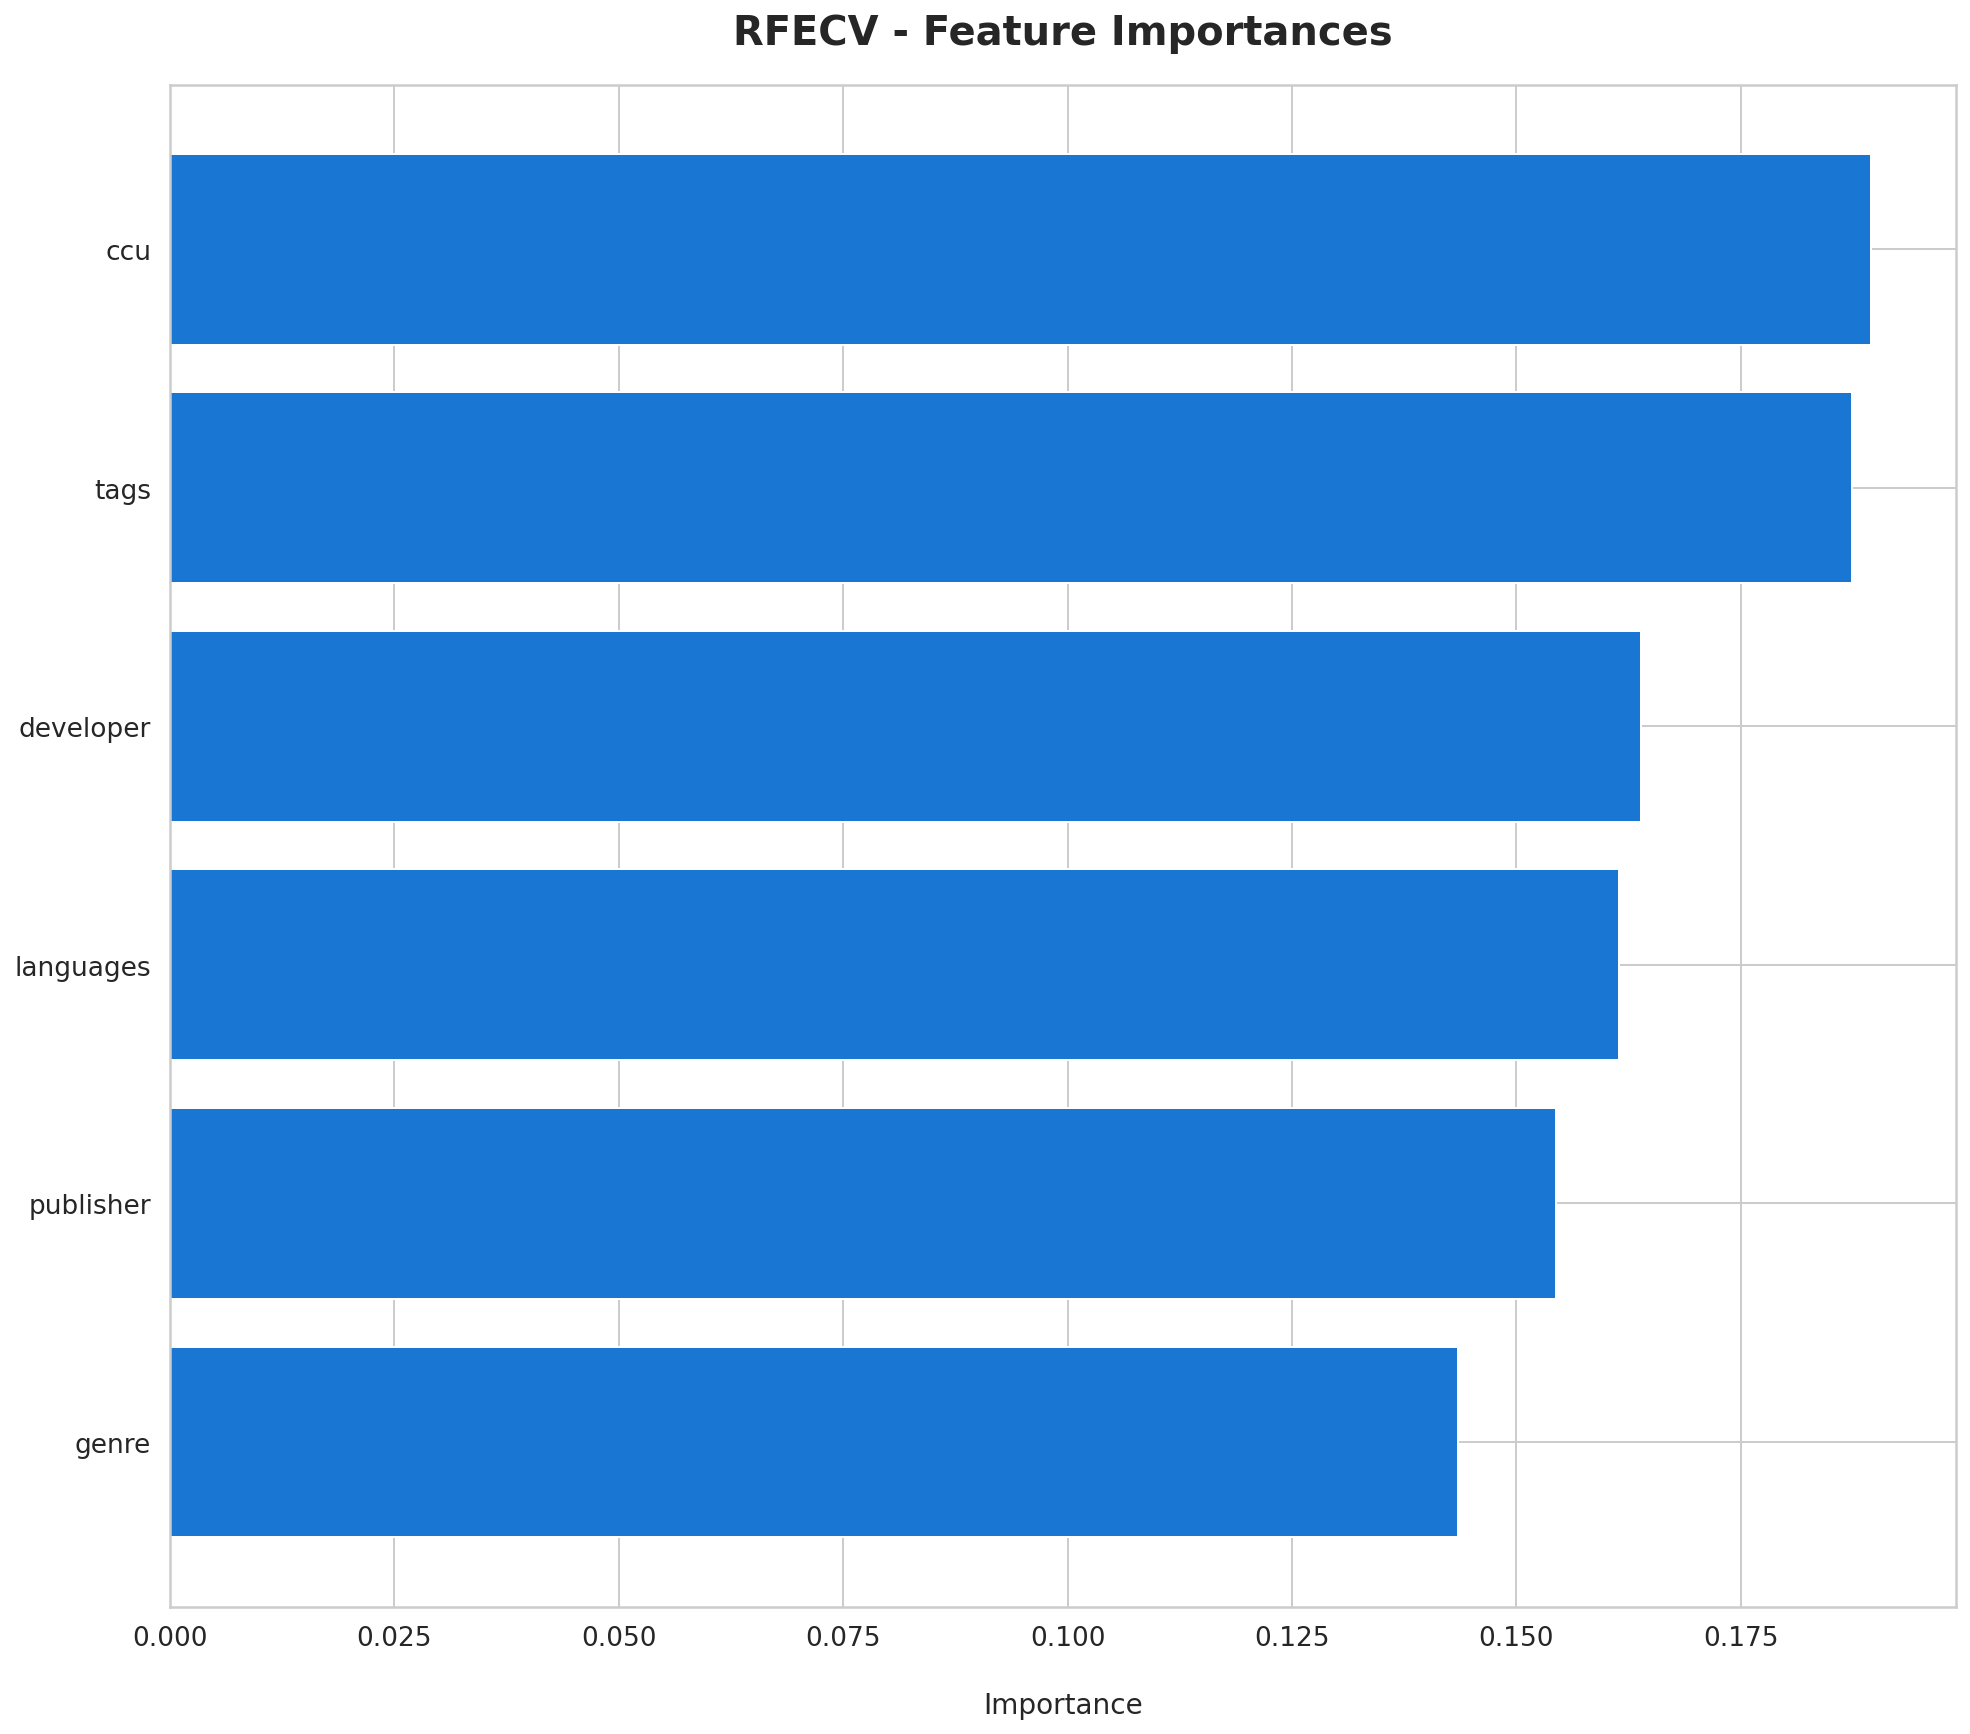

In [157]:
# Creating anew dataframe with column names and feature importance
dset = pd.DataFrame()
data1 = steam_data
data1.drop(columns=['N2Pr_binned'],inplace=True)
dset['attr'] = data1.columns

dset['importance'] = clf_rf.feature_importances_
# Sorting with importance column
dset = dset.sort_values(by = 'importance', ascending=True)

# Barplot indicating Feature Importance
plt.figure(figsize=(16, 14))
plt.barh(y = dset['attr'], width = dset['importance'], color = '#1976D2')
plt.title('RFECV - Feature Importances', fontsize = 20, fontweight = 'bold', pad = 20)
plt.xlabel('Importance', fontsize = 14, labelpad = 20)
plt.show()

In [158]:
# Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_opt, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [159]:
# Predicting the target variable
y_pred = classifier.predict(X_test)

In [160]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 8,  1,  8, 10],
       [ 4, 11,  5,  2],
       [ 6,  6, 15, 14],
       [ 2,  4,  8, 41]])

In [161]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

average_game       0.40      0.30      0.34        27
   flop_game       0.50      0.50      0.50        22
   good_game       0.42      0.37      0.39        41
 massive_hit       0.61      0.75      0.67        55

    accuracy                           0.52       145
   macro avg       0.48      0.48      0.48       145
weighted avg       0.50      0.52      0.50       145

